In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [224]:
pd.options.display.max_columns = 100

In [225]:
df_price = pd.read_csv('price_demand_data.csv')
df_price.head()


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [226]:
df_price["SETTLEMENTDATE"] = pd.to_datetime(df_price["SETTLEMENTDATE"])
df_price["SETTLEMENTDATE"] = df_price["SETTLEMENTDATE"].dt.date
df_price.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,2021-01-01,4179.21,LOW
1,VIC1,2021-01-01,4047.76,LOW
2,VIC1,2021-01-01,3934.70,LOW
3,VIC1,2021-01-01,3766.45,LOW
4,VIC1,2021-01-01,3590.37,LOW


In [227]:
df_price["PRICECATEGORY"].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [228]:
df_price['PRICECATEG'] = df_price['PRICECATEGORY'].replace(['LOW','MEDIUM','HIGH','EXTREME'],[0,1,2,3])

In [229]:
df_price['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [230]:
df_price['PRICECATEG'].value_counts()

0    7570
1    3061
2     777
3     256
Name: PRICECATEG, dtype: int64

In [231]:
df_price.loc[df_price['PRICECATEG'] == 1]

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,PRICECATEG
373,VIC1,2021-08-01,5352.25,MEDIUM,1
374,VIC1,2021-08-01,5321.80,MEDIUM,1
417,VIC1,2021-09-01,5452.03,MEDIUM,1
418,VIC1,2021-09-01,5653.12,MEDIUM,1
419,VIC1,2021-09-01,5812.76,MEDIUM,1
...,...,...,...,...,...
11659,VIC1,2021-08-31,4861.91,MEDIUM,1
11660,VIC1,2021-08-31,4748.74,MEDIUM,1
11661,VIC1,2021-08-31,4620.09,MEDIUM,1
11662,VIC1,2021-08-31,4834.00,MEDIUM,1


In [110]:
#A model which predicts the maximum daily price category based on the provided weather data.




In [232]:
df_price_max = pd.DataFrame(df_price.groupby("SETTLEMENTDATE").PRICECATEG.max())
#df_price_max.reset_index(inplace=True)

In [233]:
df_price_max

,PRICECATEG
SETTLEMENTDATE,
2021-01-01,0
2021-01-02,1
2021-01-03,0
2021-01-04,1
2021-01-05,1
...,...
2021-12-04,2
2021-12-05,3
2021-12-06,3


In [234]:
df_price_max.reset_index(inplace=True)

In [235]:
df_price_max

,SETTLEMENTDATE,PRICECATEG
0,2021-01-01,0
1,2021-01-02,1
2,2021-01-03,0
3,2021-01-04,1
4,2021-01-05,1
...,...,...
239,2021-12-04,2
240,2021-12-05,3
241,2021-12-06,3
242,2021-12-07,2


In [236]:

df_price_max["SETTLEMENTDATE"] = pd.to_datetime(df_price_max["SETTLEMENTDATE"])

In [237]:
df_price_max["PRICECATEG"].value_counts()


1    77
3    64
2    61
0    42
Name: PRICECATEG, dtype: int64

In [238]:
df_price_max.shape

(244, 2)

In [239]:
df_weather = pd.read_csv('weather_data.csv')
df_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [240]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"], format="%d/%m/%Y")
df_weather.head()


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [241]:
df_weather.shape

(243, 21)

In [242]:
# merge the weather data with the price data
df = pd.merge(df_price_max, df_weather, left_on="SETTLEMENTDATE", right_on="Date")

In [243]:
df


,SETTLEMENTDATE,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,1,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,1,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2021-08-27,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
208,2021-08-28,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
209,2021-08-29,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
210,2021-08-30,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,70.0,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   SETTLEMENTDATE                     212 non-null    datetime64[ns]
 1   PRICECATEG                         212 non-null    int64         
 2   Date                               212 non-null    datetime64[ns]
 3   Minimum temperature (°C)           211 non-null    float64       
 4   Maximum temperature (°C)           211 non-null    float64       
 5   Rainfall (mm)                      211 non-null    float64       
 6   Evaporation (mm)                   212 non-null    float64       
 7   Sunshine (hours)                   212 non-null    float64       
 8   Direction of maximum wind gust     209 non-null    object        
 9   Speed of maximum wind gust (km/h)  209 non-null    float64       
 10  Time of maximum wind gust          209

In [245]:
# display categorical columns
df[df.select_dtypes(include=['object']).columns]

,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,9am wind speed (km/h),3pm wind direction,3pm wind speed (km/h)
0,NNE,13:14,N,2,E,13
1,NNW,8:22,NNW,17,SW,4
2,WSW,17:55,WSW,4,SSW,2
3,SSE,16:03,SSE,11,SSW,17
4,SSE,11:02,SSE,13,SSE,19
...,...,...,...,...,...,...
207,SSW,12:18,,Calm,SSE,7
208,N,13:14,N,7,NNW,24
209,NNE,1:50,N,13,S,6
210,NNW,14:04,N,15,NNW,28


In [246]:
df['9am wind speed (km/h)']= pd.to_numeric(df['9am wind speed (km/h)'], errors='coerce')
df['3pm wind speed (km/h)']= pd.to_numeric(df['3pm wind speed (km/h)'], errors='coerce')

In [247]:
to_drop = ['Time of maximum wind gust','SETTLEMENTDATE']
df.drop(to_drop, axis=1, inplace=True)

In [248]:
df


,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,19.2,77.0,6,N,2.0,1018.8,28.1,43,5.0,E,13.0,1015.3
1,1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,23.3,52.0,7,NNW,17.0,1013.3,28.7,38,7.0,SW,4.0,1008.5
2,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,18.3,100.0,8,WSW,4.0,1007.7,23.5,59,4.0,SSW,2.0,1005.2
3,1,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16.2,98.0,8,SSE,11.0,1010.0,18.2,82,8.0,SSW,17.0,1011.0
4,1,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,17.2,96.0,8,SSE,13.0,1012.5,18.2,82,8.0,SSE,19.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,7.7,88.0,7,,NaN,1020.0,12.8,65,7.0,SSE,7.0,1017.4
208,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,9.1,80.0,1,N,7.0,1018.6,17.4,31,3.0,NNW,24.0,1013.5
209,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,10.6,79.0,7,N,13.0,1011.4,12.8,84,7.0,S,6.0,1010.4
210,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,11.1,70.0,7,N,15.0,1016.1,16.8,45,1.0,NNW,28.0,1013.2


In [249]:
# fill missing values with the mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# fill missing string with mode
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   PRICECATEG                         212 non-null    int64         
 1   Date                               212 non-null    datetime64[ns]
 2   Minimum temperature (°C)           212 non-null    float64       
 3   Maximum temperature (°C)           212 non-null    float64       
 4   Rainfall (mm)                      212 non-null    float64       
 5   Evaporation (mm)                   212 non-null    float64       
 6   Sunshine (hours)                   212 non-null    float64       
 7   Direction of maximum wind gust     212 non-null    object        
 8   Speed of maximum wind gust (km/h)  212 non-null    float64       
 9   9am Temperature (°C)               212 non-null    float64       
 10  9am relative humidity (%)          212

In [251]:
# label encoding
from sklearn.preprocessing import LabelEncoder

cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [252]:
df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,2021-01-01,15.6,29.9,0.0,2.8,9.3,4,31.0,19.2,77.0,6,4,2.000000,1018.800000,28.1,43,5.0,1,13.0,1015.3
1,1,2021-01-02,18.4,29.0,0.0,9.4,1.3,5,30.0,23.3,52.0,7,7,17.000000,1013.300000,28.7,38,7.0,13,4.0,1008.5
2,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,14,33.0,18.3,100.0,8,16,4.000000,1007.700000,23.5,59,4.0,12,2.0,1005.2
3,1,2021-01-04,16.0,18.6,2.6,3.8,0.0,9,41.0,16.2,98.0,8,11,11.000000,1010.000000,18.2,82,8.0,12,17.0,1011.0
4,1,2021-01-05,15.9,19.1,11.2,1.0,0.0,9,35.0,17.2,96.0,8,11,13.000000,1012.500000,18.2,82,8.0,11,19.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,10,15.0,7.7,88.0,7,0,10.361809,1020.000000,12.8,65,7.0,11,7.0,1017.4
208,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,2,39.0,9.1,80.0,1,4,7.000000,1018.600000,17.4,31,3.0,7,24.0,1013.5
209,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,4,33.0,10.6,79.0,7,4,13.000000,1011.400000,12.8,84,7.0,9,6.0,1010.4
210,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,5,50.0,11.1,70.0,7,4,15.000000,1016.100000,16.8,45,1.0,7,28.0,1013.2


In [77]:
#df

In [253]:
df['Avg Temp'] = pd.DataFrame((df['Minimum temperature (°C)'] + df['Maximum temperature (°C)'])/2)

In [254]:
df['AvgdayTemp'] = pd.DataFrame((df['3pm Temperature (°C)'] + df['9am Temperature (°C)'])/2)

In [255]:
df['Avghumidity']= pd.DataFrame((df['9am relative humidity (%)'] + df['3pm relative humidity (%)'])/2)

In [256]:
df['Vartoavgmaxtemp'] = pd.DataFrame((df['Maximum temperature (°C)'] - df['Maximum temperature (°C)'].mean()).abs())

In [257]:
df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Avg Temp,AvgdayTemp,Avghumidity,Vartoavgmaxtemp
0,0,2021-01-01,15.6,29.9,0.0,2.8,9.3,4,31.0,19.2,77.0,6,4,2.000000,1018.800000,28.1,43,5.0,1,13.0,1015.3,22.75,23.65,60.0,10.57346
1,1,2021-01-02,18.4,29.0,0.0,9.4,1.3,5,30.0,23.3,52.0,7,7,17.000000,1013.300000,28.7,38,7.0,13,4.0,1008.5,23.70,26.00,45.0,9.67346
2,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,14,33.0,18.3,100.0,8,16,4.000000,1007.700000,23.5,59,4.0,12,2.0,1005.2,21.60,20.90,79.5,6.87346
3,1,2021-01-04,16.0,18.6,2.6,3.8,0.0,9,41.0,16.2,98.0,8,11,11.000000,1010.000000,18.2,82,8.0,12,17.0,1011.0,17.30,17.20,90.0,0.72654
4,1,2021-01-05,15.9,19.1,11.2,1.0,0.0,9,35.0,17.2,96.0,8,11,13.000000,1012.500000,18.2,82,8.0,11,19.0,1013.3,17.50,17.70,89.0,0.22654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,2021-08-27,4.6,13.6,0.0,1.2,3.8,10,15.0,7.7,88.0,7,0,10.361809,1020.000000,12.8,65,7.0,11,7.0,1017.4,9.10,10.25,76.5,5.72654
208,1,2021-08-28,5.3,17.8,0.0,1.6,9.6,2,39.0,9.1,80.0,1,4,7.000000,1018.600000,17.4,31,3.0,7,24.0,1013.5,11.55,13.25,55.5,1.52654
209,3,2021-08-29,9.1,16.2,0.6,6.4,4.3,4,33.0,10.6,79.0,7,4,13.000000,1011.400000,12.8,84,7.0,9,6.0,1010.4,12.65,11.70,81.5,3.12654
210,2,2021-08-30,6.4,17.6,4.0,1.4,7.4,5,50.0,11.1,70.0,7,4,15.000000,1016.100000,16.8,45,1.0,7,28.0,1013.2,12.00,13.95,57.5,1.72654


In [258]:
corr_matrix = df.corr()

In [463]:
corr_matrix['PRICECATEG'].sort_values(ascending=False)

PRICECATEG                           1.000000
Avghumidity                          0.261211
9am relative humidity (%)            0.234860
3pm relative humidity (%)            0.199015
9am MSL pressure (hPa)               0.150418
3pm cloud amount (oktas)             0.138527
3pm MSL pressure (hPa)               0.130284
9am wind speed (km/h)                0.026492
Vartoavgmaxtemp                     -0.011280
9am cloud amount (oktas)            -0.013437
Direction of maximum wind gust      -0.038461
Rainfall (mm)                       -0.067422
3pm wind direction                  -0.114437
9am wind direction                  -0.123607
3pm wind speed (km/h)               -0.130714
Speed of maximum wind gust (km/h)   -0.131190
Sunshine (hours)                    -0.225787
Evaporation (mm)                    -0.422854
Minimum temperature (°C)            -0.432326
9am Temperature (°C)                -0.442047
Maximum temperature (°C)            -0.442108
3pm Temperature (°C)              

<AxesSubplot:xlabel='Avg Temp', ylabel='PRICECATEG'>

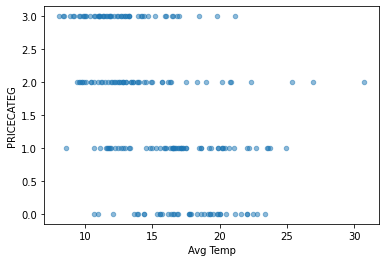

In [260]:
df.plot(kind="scatter", x="Avg Temp", y="PRICECATEG",alpha = 0.5)

<AxesSubplot:xlabel='Avg Temp', ylabel='Maximum temperature (°C)'>

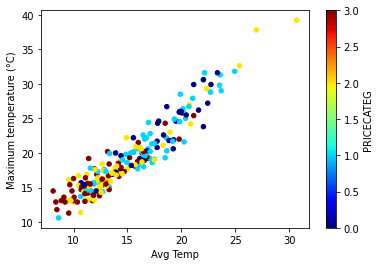

In [261]:
#plot clearly shows the red<Extreme Price group> and yellow<High price Group> 
#are more concentrated when the temperature is below 15. The Low Price group is seen when the temperature is above 15
#degrees
df.plot(kind="scatter", x="Avg Temp", y="Maximum temperature (°C)",alpha = 1,
    c="PRICECATEG", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)



In [95]:
#A strong negative correlation between AvgTemp,AvgDayTemp,3pm temperature,maximum temperature,9am temperature,minimum temperature,
#Evaporation Sunshine hours.
#Positive correlation: 9am relative humidity (%),3pm relative humidity (%)
#By negative correlation - As Temperature decreases people tend to heat the house and the energy price increases.
#As humidity increases there could be a chance people are using more energy to cool the house.
 

In [335]:

#to_drop = ['9am MSL pressure (hPa)','3pm cloud amount (oktas)','9am relative humidity (%)','3pm relative humidity (%)',
#          '3pm MSL pressure (hPa)','9am wind speed (km/h)','Vartoavgmaxtemp','9am cloud amount (oktas)','Rainfall (mm)',
#          '3pm wind speed (km/h)','Speed of maximum wind gust (km/h)','Direction of maximum wind gust ','3pm wind direction',
#          '9am wind direction','Date']
#X = df.drop(to_drop, axis=1)

In [405]:

to_drop = ['3pm cloud amount (oktas)','3pm relative humidity (%)',
          '9am wind speed (km/h)','Vartoavgmaxtemp','9am cloud amount (oktas)','Rainfall (mm)',
          '3pm wind speed (km/h)','Speed of maximum wind gust (km/h)','Direction of maximum wind gust ','3pm wind direction',
          '9am wind direction','Date']
X = df.drop(to_drop, axis=1)

In [458]:
corr_matrix1 = X.corr()

In [459]:
corr_matrix1['PRICECATEG'].sort_values(ascending=False)

KeyError: 'PRICECATEG'

In [408]:
X.drop('PRICECATEG', axis=1, inplace = True)

In [339]:
#X.drop('Sunshine (hours)',axis =1, inplace = True)

In [348]:
#X.drop('9am Temperature (°C)',axis = 1, inplace = True)

In [415]:
X.drop('3pm MSL pressure (hPa)',axis = 1, inplace = True)

In [433]:
X.drop('9am MSL pressure (hPa)',axis = 1, inplace = True)

In [357]:
#X.drop('Maximum temperature (°C)',axis = 1, inplace = True)

In [361]:
#X.drop('Avghumidity',axis = 1, inplace = True)

In [476]:
X

,Minimum temperature (°C),Maximum temperature (°C),Evaporation (mm),Sunshine (hours),9am Temperature (°C),9am relative humidity (%),3pm Temperature (°C),Avg Temp,AvgdayTemp,Avghumidity
0,15.6,29.9,2.8,9.3,19.2,77.0,28.1,22.75,23.65,60.0
1,18.4,29.0,9.4,1.3,23.3,52.0,28.7,23.70,26.00,45.0
2,17.0,26.2,4.8,7.1,18.3,100.0,23.5,21.60,20.90,79.5
3,16.0,18.6,3.8,0.0,16.2,98.0,18.2,17.30,17.20,90.0
4,15.9,19.1,1.0,0.0,17.2,96.0,18.2,17.50,17.70,89.0
...,...,...,...,...,...,...,...,...,...,...
207,4.6,13.6,1.2,3.8,7.7,88.0,12.8,9.10,10.25,76.5
208,5.3,17.8,1.6,9.6,9.1,80.0,17.4,11.55,13.25,55.5
209,9.1,16.2,6.4,4.3,10.6,79.0,12.8,12.65,11.70,81.5
210,6.4,17.6,1.4,7.4,11.1,70.0,16.8,12.00,13.95,57.5


In [436]:
y = df['PRICECATEG']

In [437]:
y

0      0
1      1
2      0
3      1
4      1
      ..
207    3
208    1
209    3
210    2
211    1
Name: PRICECATEG, Length: 212, dtype: int64

In [584]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as nd

In [585]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
neighbour_accuracy=[]
for neighbours in range(1,10):
    accuracy_scores=[]
    for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        features_train = X.iloc[train_index, :]
        features_test = X.iloc[test_index, :]

        class_train = y[train_index]
        class_test = y[test_index]

        scaler = preprocessing.StandardScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)

        knn = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
        knn.fit(features_train, class_train)

        predictions = knn.predict(features_test)
        accuracy_scores.append(accuracy_score(class_test, predictions))
    neighbour_accuracy.append(sum(accuracy_scores)/k)

print(neighbour_accuracy)

[0.40519480519480516, 0.3727272727272727, 0.40995670995670996, 0.40367965367965375, 0.4225108225108225, 0.41796536796536793, 0.4519480519480519, 0.47056277056277046, 0.4612554112554113]


In [586]:
#This KNN model is having an accuracy of 47% where k fold is 10 and neighbours is 8.
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
neighbour_accuracy=[]
for neighbours in range(8,9):
    accuracy_scores=[]
    for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        features_train = X.iloc[train_index, :]
        features_test = X.iloc[test_index, :]

        class_train = y[train_index]
        class_test = y[test_index]

  
        scaler = preprocessing.StandardScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)

        knn = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
        knn.fit(features_train, class_train)

        predictions = knn.predict(features_test)
        accuracy_scores.append(accuracy_score(class_test, predictions))
    neighbour_accuracy.append(sum(accuracy_scores)/k)
#print(accuracy_scores)
print(neighbour_accuracy)


[0.47056277056277046]


In [193]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [522]:
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores=[]
#confusion_matrix = metrics.confusion_matrix()

for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        features_train1 = X.iloc[train_index, :]
        features_test1 = X.iloc[test_index, :]

        class_train1 = y[train_index]
        class_test1 = y[test_index]

        scaler = preprocessing.StandardScaler()
        features_train1 = scaler.fit_transform(features_train1)
        features_test1 = scaler.transform(features_test1)
        #print(features_test1)
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
        dt.fit(features_train1, class_train1)
        predictions1 = dt.predict(features_test1)
       
        #cm = confusion_matrix(features_test1, predictions1)
        #sns.heatmap(cm, annot=True, fmt="d")
        #plt.show()
        accuracy_scores.append(accuracy_score(class_test1, predictions1))
print(sum(accuracy_scores)/k)



0.41044973544973545


In [579]:
from sklearn import tree

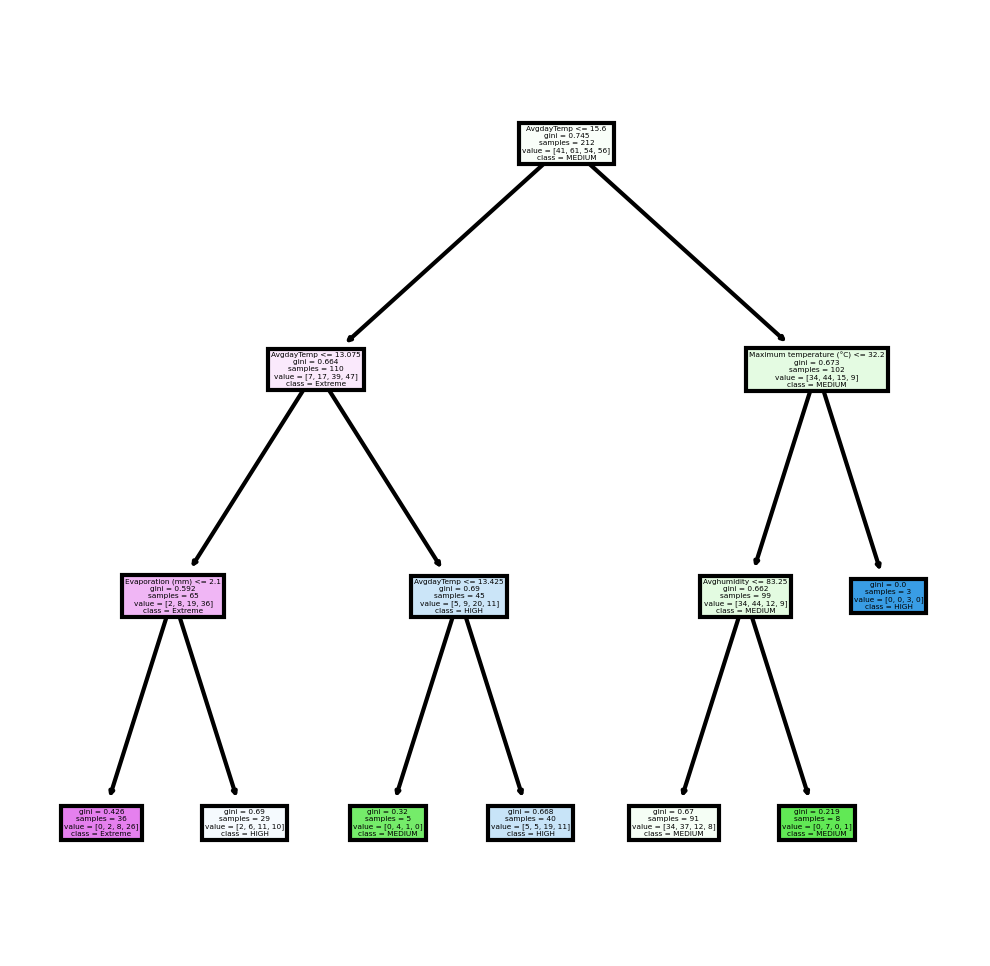

In [582]:
dt = DecisionTreeClassifier(max_depth=3)
clf = dt.fit(X, y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
           feature_names = X.columns, 
           class_names=['LOW','MEDIUM','HIGH', 'Extreme'],
           filled = True);

In [ ]:
f = nd.array(X.iloc[90])

In [571]:
f

array([11.5, 15.1,  4.2,  1.3, 12.3, 75. , 14.5, 13.3, 13.4, 65.5])

In [572]:
C = f.reshape(-1,10)

In [573]:
C

array([[11.5, 15.1,  4.2,  1.3, 12.3, 75. , 14.5, 13.3, 13.4, 65.5]])

In [574]:
prediction1 = dt.predict(C)

In [583]:
prediction1

array([3])

In [560]:
y.loc[0]

0

In [503]:
X.iloc[120,:]

Minimum temperature (°C)     12.0
Maximum temperature (°C)     17.0
Evaporation (mm)              4.0
Sunshine (hours)              0.2
9am Temperature (°C)         12.7
9am relative humidity (%)    62.0
3pm Temperature (°C)         16.7
Avg Temp                     14.5
AvgdayTemp                   14.7
Avghumidity                  58.5
Name: 120, dtype: float64

In [ ]:

End of Zach File: